# Penalized Regression and Dimensionality Reduction

The third assignment will takle the peanlized regression problem in order to reduce the number of significant predictors. We can use two different methods: **Ridge** or **Lasso** penalization, which can be applied to both the linear regression and the logisit regression.
These methods can be applied when we have a lot of predictors and we want to reduce the dimensionality because a lot of them can be multicollinear, similar to other ad add noise to our predictions.

We will see them applied to the **classification** problem.

Moreover, you will be asked to evaluate the models using the different metrics specific to the *classification* problem.


The dataset used in this second part is different, because now we will takle a classification problem in which the target variable assumes only 2 possible values: 0 or 1, and it is no longer a continuos output.

In the second part of the assignment we will work on data manipulation (how to populat the missings) and on the Logistic Regression. The Logistic Regression allows us to **classify**  if the individual, given some features, will obtain the loan (target=1) or will not obtain the loan (target=0). In the dataset there are multiple vairables related to the individuals, which are a little less than 40K, related to: amount of credit requested, annual income, number of children, type of job, etc...

The dataset is not "ready-to-go", hence before fitting the Logistic regression you will need to manipulate the data in order to clean them. Moreover, there are some initial steps in order to include dummy vairables and non-linear predictors which you have already seen in the previous assignmemnt.

Each group has to do the following: 

1. From sklearn.metrics import the following metrics to evaluate the models: accuracy score, roc_auc_score,confusion_matrix, classification report, roc_curve and precision_score
2. From sklearn import the packages needed to perform: Logist Regression, GridSearch and spli of the sample.
3. If there are missings populate them using one of the methods we saw in the Tutorial 1 and **explain why you have decided to use such method**.
4. Determine how many are the categorical variables using the command **.dtypes()**. Convert all of them into dumy using the command **.get_dummy()** proper of the pandas DataFrame Structure, and include them to the original dataset.
5. Take the variables **AMT_CREDIT**, **AMT_INCOME_TOTAL**, **CNT_FAM_MEMBERS** from X, and by using the class **PolynomialFeature** create the non-linear combinations. You need to compute all the second order combinations. The option that needs to be specified are: **degree=2**, **interaction_only=False**, **include_bias=False**, and then use the **.fit_transform(Data)** to compute all the elements. 
6. Add those elements to the dataset you have created at point 4, and split the data into training and test sample.
7. We want to fit the penalized logistic regression with both Lasso and Ridge penalization but first we need to standardize the predictors (X):
     - Standardize only the variables that are recorded as **'float64'**. Do not standardize the dummy variables or the numerical one (recorded as integer numbers 1,2,3 etc..). 
     
     **Hint**: Split the variables, of both the training and the test, in two groups, one that contians the 'float64' vairbales, by type using **.select_dtypes(include=['float64'])**, which needs to be standardize, and one that contains the 'int64' variables, by using **.select_dtypes(include=['int64'])** ,which do not have to be standardized. Once you have standardized the 'float64' variables, you need to concatenate them with the 'int64' ones.
     - Use the mean and the standard deviation of the training sample to standardize also the test sample variables.
8. Define and fit the Logistic Regression with Ridge penalization (l2 penalty) using **GridSearchCV**. Use 100 values of lambdas starting from 0 to 10 and a number of fold equalt to 5(cv = 5). Specify return_train_score= True. (**NB** the hyperparameters name in Python is 'C' not lambda).
9. Plot the chart in which you show the evoluation of **only** the **test score** in correspondence to the lambda values. Which is the best estimator value of lambda (C)?
10. Produce the prediction using the command **.predict()**
11. Evaluate the performance using the following metrics: accuracy_score and roc_auc_score.
12. Show the classification_report and the confusion matrix. 
13. Compute manually the accuracy, precision, and sensitivity values from the confusion matrix. (**NB** they should be the same as the one in the classification report related to the outcome 1)

14. Define and fit the Logistic Regression with Lasso penalization (l1 penalty) using **GridSearchCV**. Use 100 values of lambdas starting from 0 to 10 and a number of fold equal to 5(cv = 5). Specify return_train_score= True. (**NB** the hyperparameters name in Python is 'C' not lambda). (Use the standardized training and test data defined at point 7.)
15. Do from point 11 to point 14 for the Logistic Regression with Lasso penalization.
16. Which one between the Ridge and the Lasso penalization delivers the best performance in terms of accuracy? Which has the best precision values? Which one has the best recall (sensitivity) value?

17.  Define and fit the Logistic Regression with Ridge penalization (l2 penalty) specifing also **class_weight='balanced' **. Use **GridSearchCV** to estimate the shrinkage parameter. Use 100 values of lambdas starting from 0 to 10 and a number of fold equalt to 5(cv = 5). (Use the standardized training and test data defined at point 7.)
18. Produce the prediction using the command **.predict()**
19. Evaluate the performance using the classification report.
20. Have the results of the classification report at point 19 changed from the one at point 12? If yes, why?




In [1]:
## Q1 and Q2: load all the other packages, class or function in order to complete the assignment.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
from sklearn.metrics import classification_report, roc_curve, precision_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, GridSearchCV
import warnings
warnings.filterwarnings("ignore")

In [2]:
# import the data using pandas
loan_data = pd.read_csv("../Data/loan_balanced_missing.csv", header = 0, sep=",")

# Display the first 5 rows and 10 colums of the dataset.
loan_data.head()

,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,CNT_CHILDREN,CNT_FAM_MEMBERS,CODE_GENDER,DAYS_EMPLOYED,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE,DAYS_REGISTRATION,...,NAME_TYPE_SUITE,ORGANIZATION_TYPE,REGION_POPULATION_RELATIVE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,TARGET
0,1078200.0,31522.5,135000.0,1,3,F,-230,-1118,NaN,-4962,...,Unaccompanied,Trade: type 2,0.010643,2,2,1,1,0,0,1
1,284400.0,19134.0,112500.0,1,3,F,-1338,-1076,-938.0,-673,...,Unaccompanied,Business Entity Type 3,0.006629,2,2,0,0,0,0,0
2,942300.0,27679.5,121500.0,0,1,F,365243,-4116,-2052.0,-357,...,Unaccompanied,XNA,0.019689,2,2,0,0,0,0,1
3,429763.5,34083.0,315000.0,0,1,F,-1978,-839,0.0,-4549,...,Unaccompanied,Self-employed,0.008019,2,2,0,0,0,0,1
4,323388.0,25677.0,265500.0,0,1,M,-890,-543,-714.0,-5103,...,Family,Business Entity Type 3,0.072508,1,1,0,0,1,0,1


In [3]:
# Q3: Replace missing values with means
loan_data_fillna_mean = loan_data.fillna(loan_data.mean()).copy()
'''
We used mean values to fill in the missing values (not medians) in order to increase comprehensiveness of the analysis,
rather than to focus on mitigating the effect of outliers. 
'''

'\nWe used mean values to fill in the missing values (not medians) in order to increase comprehensiveness of the analysis,\nrather than to focus on mitigating the effect of outliers. \n'

In [4]:
# Q4: Determine how many are categorical variables and Convert them into dummy
print(loan_data_fillna_mean.dtypes.value_counts())
loan_data_dummy = pd.get_dummies(loan_data_fillna_mean, drop_first=True)
print(loan_data_dummy.dtypes.value_counts())

int64      37
object     10
float64     5
dtype: int64
uint8      87
int64      37
float64     5
dtype: int64


In [5]:
# Q5: create the non-linear combinations
poly_fit = PolynomialFeatures(degree = 2, interaction_only = False, 
                              include_bias= False)
data_nonlin = poly_fit.fit_transform(loan_data_dummy[['AMT_CREDIT', 
                                    'AMT_INCOME_TOTAL', 'CNT_FAM_MEMBERS']])
name_list = ['AMT_CREDIT', 'AMT_INCOME_TOTAL', 'CNT_FAM_MEMBERS',
             'AMT_CREDIT^2', 'AMT_CREDIT*AMT_INCOME_TOTAL',
             'AMT_CREDIT*CNT_FAM_MEMBERS', 'AMT_INCOME_TOTAL^2',
             'AMT_INCOME_TOTAL*CNT_FAM_MEMBERS', 'CNT_FAM_MEMBERS^2']
data_nonlin_df = pd.DataFrame(data_nonlin, columns = name_list)
# Concat the original data and non-linear data (avoid duplication)
loan_data_concat = pd.concat([loan_data_dummy.drop(['AMT_CREDIT', 
    'AMT_INCOME_TOTAL', 'CNT_FAM_MEMBERS'], axis=1), data_nonlin_df], axis=1)

In [6]:
# Q6: Split the data into training and test sample
Y = loan_data_concat[['TARGET']]
X = loan_data_concat.drop('TARGET',axis=1)

X_training, X_test, Y_training, Y_test = train_test_split(X,Y,test_size=0.2, 
                                                          random_state=3)

In [7]:
# Q7: Standardize predictors (only those in float64)
# Select float64 and int data
X_training_float = X_training.select_dtypes(include =['float64']) 
X_test_float = X_test.select_dtypes(include =['float64']) 
X_training_int = X_training.select_dtypes(include =['int64']) 
X_test_int = X_test.select_dtypes(include =['int64']) 

# standardize the data
X_training_float_std = (X_training_float - 
                        X_training_float.mean())/X_training_float.std()
X_test_float_std = (X_test_float - 
                    X_training_float.mean())/X_training_float.std()

# concatenate with int
X_training_concat = pd.concat([X_training_float_std, X_training_int], axis = 1)
X_test_concat = pd.concat([X_test_float_std, X_test_int], axis = 1)

In [8]:
# Q8: Define and fit the Logistic Regression with Ridge penalization  
# remap the target
Y_train_ = (Y_training > Y_training.median())*1
Y_test_ = (Y_test > Y_training.median())*1

# Define and fit the Logistic Regression with Ridge penalization (l2 penalty)
LogReg_ridge = LogisticRegression(penalty='l2', 
                                  solver='liblinear', random_state=8)

# Define GridSearchCV and the hyperparameters
# we define the grid at random, it can be more 
params = {'C': np.linspace(0,10,100)}

LogReg_ridge_gscv = GridSearchCV(estimator = LogReg_ridge,
                          param_grid = params,
                          cv = 5,
                          scoring = 'average_precision',
                          return_train_score= True,
                          refit = True)
# Fit the Logistic regression with ridge penalization 
# and determine the best value of Lambda
LogReg_ridge_gscv.fit(X_training_concat, Y_train_.values.flatten())
print('Best lambda: ', round(LogReg_ridge_gscv.best_params_['C'], 3))
"""
Best lambda:  0.101
"""

Best lambda:  0.101


'\nBest lambda:  0.101\n'

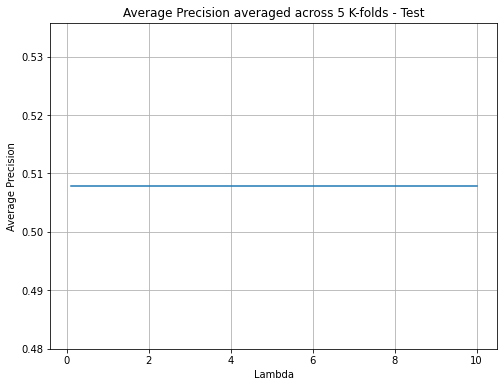

In [9]:
# Q9: Plot the chart in which you show the evoluation of only the test score
plt.figure(figsize=(8,6))
plt.plot(params['C'], LogReg_ridge_gscv.cv_results_['mean_test_score'])
plt.xlabel('Lambda')
plt.ylabel('Average Precision')
plt.title('Average Precision averaged across 5 K-folds - Test')
plt.grid()

In [10]:
# Q10: Produce the prediction using the command predict()
Y_pred_lr_ridge = LogReg_ridge_gscv.predict(X_test_concat)

# Q11: Evaluate the performance using accuracy_score and roc_auc_score
acc_score_lr_r = accuracy_score(Y_test_, Y_pred_lr_ridge)
rocauc_lr_r = roc_auc_score(Y_test_, Y_pred_lr_ridge)
print('Accuracy score: ', round(acc_score_lr_r,3))
print('Roc auc score: ', round(rocauc_lr_r,3))


Accuracy score:  0.531
Roc auc score:  0.5


In [11]:
# Q12: Show the classification_report and the confusion matrix
print(classification_report(Y_test_, Y_pred_lr_ridge))
conf_mat = confusion_matrix(Y_test_, Y_pred_lr_ridge)
conf_mat_df = pd.DataFrame(conf_mat, index = ['0', '1'], columns=['0', '1'])
conf_mat_df

              precision    recall  f1-score   support

           0       0.53      1.00      0.69      4033
           1       0.60      0.00      0.00      3557

    accuracy                           0.53      7590
   macro avg       0.57      0.50      0.35      7590
weighted avg       0.56      0.53      0.37      7590



,0,1
0,4031,2
1,3554,3


In [12]:
# Q13: Compute manually the accuracy, precision, 
# and sensitivity values from the confusion matrix
acc_manual = (conf_mat_df.iloc[0,0]+conf_mat_df.iloc[1,1])/conf_mat_df.sum().sum()
print(' Accuracy manual: ', acc_manual)
prec_manual = conf_mat_df.iloc[1,1]/(conf_mat_df.iloc[1,1]+conf_mat_df.iloc[0,1])
print(' Precision manual: ', prec_manual)
sensitivity_manual = conf_mat_df.iloc[1,1]/(conf_mat_df.iloc[1,1]+conf_mat_df.iloc[1,0])
print(' Sensitivity manual: ', sensitivity_manual)


 Accuracy manual:  0.5314888010540184
 Precision manual:  0.6
 Sensitivity manual:  0.0008434073657576609


In [13]:
# Q14: Define and fit the Logistic Regression with Lasso penalization (l1 penalty)
LogReg_lasso = LogisticRegression(penalty='l1', 
                                  solver='liblinear', random_state=8)

# Define GridSearchCV and the hyperparameters
# we define the grid at random, it can be more 
params = {'C': np.linspace(0,10,100)}

LogReg_lasso_gscv = GridSearchCV(estimator = LogReg_lasso,
                          param_grid = params,
                          cv = 5,
                          scoring = 'average_precision',
                          return_train_score= True,
                          refit = True)
# Fit the Logistic regression with lasso penalization 
# and determine the best value of Lambda
LogReg_lasso_gscv.fit(X_training_concat, Y_train_.values.flatten())
print('Best lambda: ', round(LogReg_lasso_gscv.best_params_['C'], 3))
"""
Best lambda:  0.404
"""

Best lambda:  0.404


'\nBest lambda:  0.404\n'

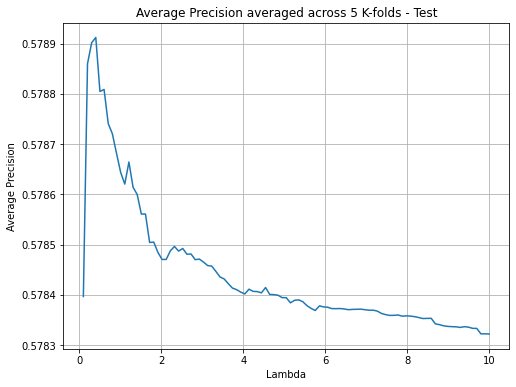

In [14]:
# Q15: Do from point 11 to point 14 for the Logistic Regression with Lasso penalization
plt.figure(figsize=(8,6))
plt.plot(params['C'], LogReg_lasso_gscv.cv_results_['mean_test_score'])
plt.xlabel('Lambda')
plt.ylabel('Average Precision')
plt.title('Average Precision averaged across 5 K-folds - Test')
plt.grid()

In [15]:
# Produce the prediction using the command predict()
Y_pred_lr_lasso = LogReg_lasso_gscv.predict(X_test_concat)

# Evaluate the performance using accuracy_score and roc_auc_score
acc_score_lr_l = accuracy_score(Y_test_, Y_pred_lr_lasso)
rocauc_lr_l = roc_auc_score(Y_test_, Y_pred_lr_lasso)
print('Accuracy score: ', round(acc_score_lr_l,3))
print('Roc auc score: ', round(rocauc_lr_l,3))

Accuracy score:  0.603
Roc auc score:  0.595


In [16]:
# Show the classification_report and the confusion matrix
print(classification_report(Y_test_, Y_pred_lr_lasso))
conf_mat = confusion_matrix(Y_test_, Y_pred_lr_lasso)
conf_mat_df = pd.DataFrame(conf_mat, index = ['0', '1'], columns=['0', '1'])
conf_mat_df

              precision    recall  f1-score   support

           0       0.61      0.73      0.66      4033
           1       0.60      0.46      0.52      3557

    accuracy                           0.60      7590
   macro avg       0.60      0.60      0.59      7590
weighted avg       0.60      0.60      0.60      7590



,0,1
0,2933,1100
1,1910,1647


In [17]:
# Compute manually the accuracy, precision, 
# and sensitivity values from the confusion matrix
acc_manual = (conf_mat_df.iloc[0,0]+conf_mat_df.iloc[1,1])/conf_mat_df.sum().sum()
print(' Accuracy manual: ', acc_manual)
prec_manual = conf_mat_df.iloc[1,1]/(conf_mat_df.iloc[1,1]+conf_mat_df.iloc[0,1])
print(' Precision manual: ', prec_manual)
sensitivity_manual = conf_mat_df.iloc[1,1]/(conf_mat_df.iloc[1,1]+conf_mat_df.iloc[1,0])
print(' Sensitivity manual: ', sensitivity_manual)

 Accuracy manual:  0.6034255599472991
 Precision manual:  0.5995631598107026
 Sensitivity manual:  0.4630306438009559


In [18]:
"""
Q16:
Which one between the Ridge and the Lasso penalization delivers the best performance in terms of accuracy? 
Which has the best precision values? 
Which one has the best recall (sensitivity) value?

In terms of accuracy, Lasso provides the best performance. (Ridge: 0.53, Lasso: 0.60)
Regarding precision, the performance of Ridge is slightly better than that of Lasso. (Ridge: 0.6, Lasso: 0.59)
Lasso delivers a far better performance in terms of sensitivity. (Ridge: 0.00084, Lasso: 0.46)
"""

'\nQ16:\nWhich one between the Ridge and the Lasso penalization delivers the best performance in terms of accuracy? \nWhich has the best precision values? \nWhich one has the best recall (sensitivity) value?\n\nIn terms of accuracy, Lasso provides the best performance. (Ridge: 0.53, Lasso: 0.60)\nRegarding precision, the performance of Ridge is slightly better than that of Lasso. (Ridge: 0.6, Lasso: 0.59)\nLasso delivers a far better performance in terms of sensitivity. (Ridge: 0.00084, Lasso: 0.46)\n'

In [19]:
# Q17: Define and fit the Logistic Regression with Ridge penalization (l2 penalty) specifing also class_weight='balanced' 

LogReg_ridge_bal = LogisticRegression(penalty='l2',
                                  class_weight = 'balanced',
                                  solver='liblinear', random_state=8)

# Define GridSearchCV and the hyperparameters
# we define the grid at random, it can be more 
params = {'C': np.linspace(0,10,100)}

LogReg_ridge_gscv_bal = GridSearchCV(estimator = LogReg_ridge_bal,
                          param_grid = params,
                          cv = 5,
                          scoring = 'average_precision',
                          return_train_score= True,
                          refit = True)
# Fit the Logistic regression with ridge penalization 
# and determine the best value of Lambda
LogReg_ridge_gscv_bal.fit(X_training_concat, Y_train_.values.flatten())
print('Best lambda: ', round(LogReg_ridge_gscv_bal.best_params_['C'], 3))
"""
Best lambda:  0.101
"""


Best lambda:  0.101


'\nBest lambda:  0.101\n'

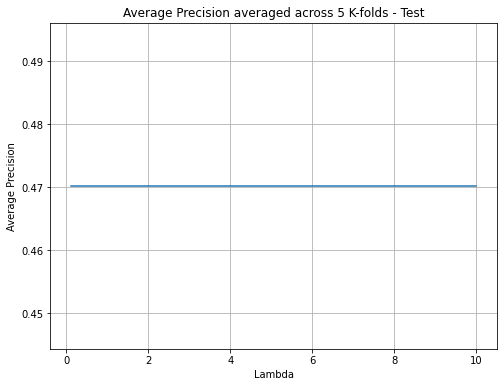

In [20]:
# Plot
plt.figure(figsize=(8,6))
plt.plot(params['C'], LogReg_ridge_gscv_bal.cv_results_['mean_test_score'])
plt.xlabel('Lambda')
plt.ylabel('Average Precision')
plt.title('Average Precision averaged across 5 K-folds - Test')
plt.grid()

In [21]:
# Q18: Produce the prediction using the command predict()
Y_pred_lr_ridge_bal = LogReg_ridge_gscv_bal.predict(X_test_concat)

# Q19: Evaluate the using accuracy_score and roc_auc_score
acc_score_lr_r_bal = accuracy_score(Y_test_, Y_pred_lr_ridge_bal)
rocauc_lr_r_bal = roc_auc_score(Y_test_, Y_pred_lr_ridge_bal)
print('Accuracy score: ', round(acc_score_lr_r_bal,3))
print('Roc auc score: ', round(rocauc_lr_r_bal,3))


Accuracy score:  0.532
Roc auc score:  0.514


In [22]:
# Q19: Evaluate the performance using the classification report
print(classification_report(Y_test_, Y_pred_lr_ridge_bal))
conf_mat = confusion_matrix(Y_test_, Y_pred_lr_ridge_bal)
conf_mat_df = pd.DataFrame(conf_mat, index = ['0', '1'], columns=['0', '1'])
conf_mat_df

              precision    recall  f1-score   support

           0       0.54      0.80      0.64      4033
           1       0.50      0.23      0.32      3557

    accuracy                           0.53      7590
   macro avg       0.52      0.51      0.48      7590
weighted avg       0.52      0.53      0.49      7590



,0,1
0,3208,825
1,2728,829


In [23]:
# Compute manually the accuracy, precision, 
# and sensitivity values from the confusion matrix
acc_manual = (conf_mat_df.iloc[0,0]+conf_mat_df.iloc[1,1])/conf_mat_df.sum().sum()
print(' Accuracy manual: ', acc_manual)
prec_manual = conf_mat_df.iloc[1,1]/(conf_mat_df.iloc[1,1]+conf_mat_df.iloc[0,1])
print(' Precision manual: ', prec_manual)
sensitivity_manual = conf_mat_df.iloc[1,1]/(conf_mat_df.iloc[1,1]+conf_mat_df.iloc[1,0])
print(' Sensitivity manual: ', sensitivity_manual)


 Accuracy manual:  0.5318840579710145
 Precision manual:  0.5012091898428053
 Sensitivity manual:  0.23306156873770031


In [24]:
"""
Q20:
Have the results of the classification report at point 19 changed from the one at point 12? If yes, why?

Yes, there is no significant change in the precision but the recall (sensitivity) increaces from 0.0008 to 0.23.
The reason behind this is that the large disparity between positives and negatives were adjusted by explicitly specifying the param 
class_weight = 'balanced' so that more negatives are detected

"""

"\nQ20:\nHave the results of the classification report at point 19 changed from the one at point 12? If yes, why?\n\nYes, there is no significant change in the precision but the recall (sensitivity) increaces from 0.0008 to 0.23.\nThe reason behind this is that the large disparity between positives and negatives were adjusted by explicitly specifying the param \nclass_weight = 'balanced' so that more negatives are detected\n\n"

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=26e61e51-8df2-4f94-b353-f6e5a84655c2' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>